In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data files into DataFrames
customers_df = pd.read_csv('data/olist_customers_dataset.csv')
geolocation_df = pd.read_csv('data/olist_geolocation_dataset.csv')
order_items_df = pd.read_csv('data/olist_order_items_dataset.csv')
order_payments_df = pd.read_csv('data/olist_order_payments_dataset.csv')
order_reviews_df = pd.read_csv('data/olist_order_reviews_dataset.csv')
orders_df = pd.read_csv('data/olist_orders_dataset.csv')
products_df = pd.read_csv('data/olist_products_dataset.csv')
sellers_df = pd.read_csv('data/olist_sellers_dataset.csv')
category_translation_df = pd.read_csv('data/product_category_name_translation.csv')

In [3]:
# Quick look at the datasets
print(customers_df.head())
print(orders_df.head())
print(order_items_df.head())
# And so on for other DataFrames to understand their structures and columns.

                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP  
                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cd

In [7]:
# Merge orders with customers on 'customer_id'
orders_data = pd.merge(orders_df, customers_df, on='customer_id', how='left')

# Merge with order items on 'order_id'
orders_data = pd.merge(orders_data, order_items_df, on='order_id', how='left')

# Merge with order payments on 'order_id'
orders_data = pd.merge(orders_data, order_payments_df, on='order_id', how='left')

In [9]:
# Convert dates to datetime format
orders_data['order_purchase_timestamp'] = pd.to_datetime(orders_data['order_purchase_timestamp'])

# Extract year and month for analysis
orders_data['order_year'] = orders_data['order_purchase_timestamp'].dt.year
orders_data['order_month'] = orders_data['order_purchase_timestamp'].dt.month

In [11]:
# Merge product and category data
orders_data = pd.merge(orders_data, products_df, on='product_id', how='left')
orders_data = pd.merge(orders_data, category_translation_df, on='product_category_name', how='left')

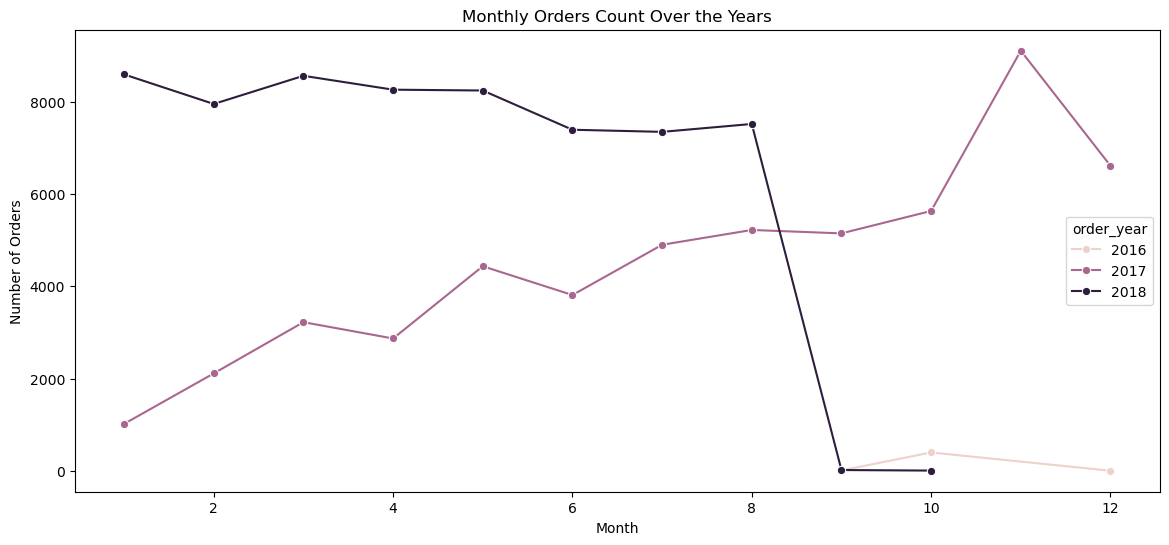

In [13]:
# Monthly orders
monthly_orders = orders_data.groupby(['order_year', 'order_month']).size().reset_index(name='order_count')

plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_orders, x='order_month', y='order_count', hue='order_year', marker='o')
plt.title('Monthly Orders Count Over the Years')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.show()

/var/folders/_y/rtc0yj4j6pj_34cf7bf1rvk00000gn/T/ipykernel_36645/1386410778.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=orders_by_state, x='customer_state', y='order_count', palette='viridis')


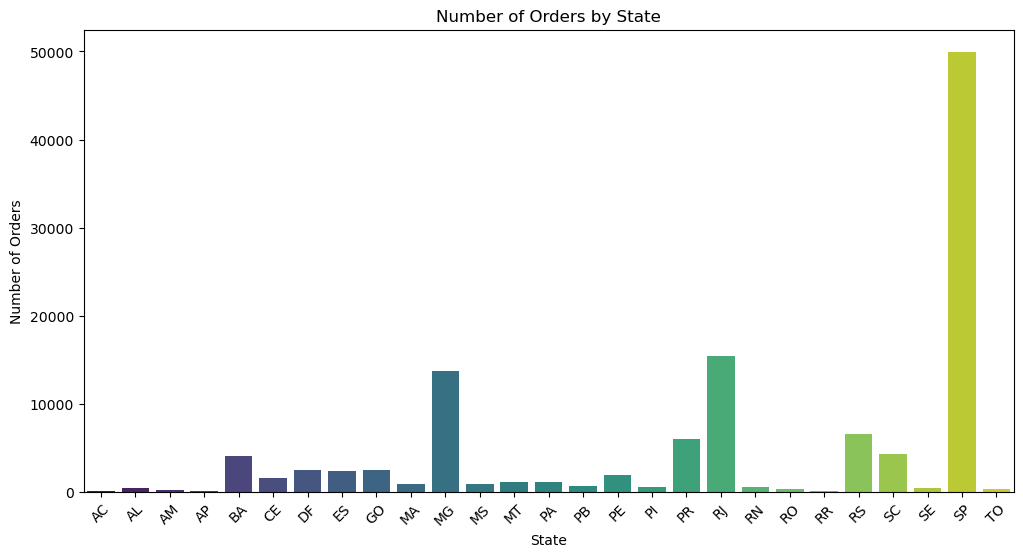

In [15]:
# Number of orders by customer state
orders_by_state = orders_data.groupby('customer_state').size().reset_index(name='order_count')

plt.figure(figsize=(12, 6))
sns.barplot(data=orders_by_state, x='customer_state', y='order_count', palette='viridis')
plt.title('Number of Orders by State')
plt.xlabel('State')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

/var/folders/_y/rtc0yj4j6pj_34cf7bf1rvk00000gn/T/ipykernel_36645/1926676017.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_categories, x='product_category_name_english', y='order_count', palette='coolwarm')


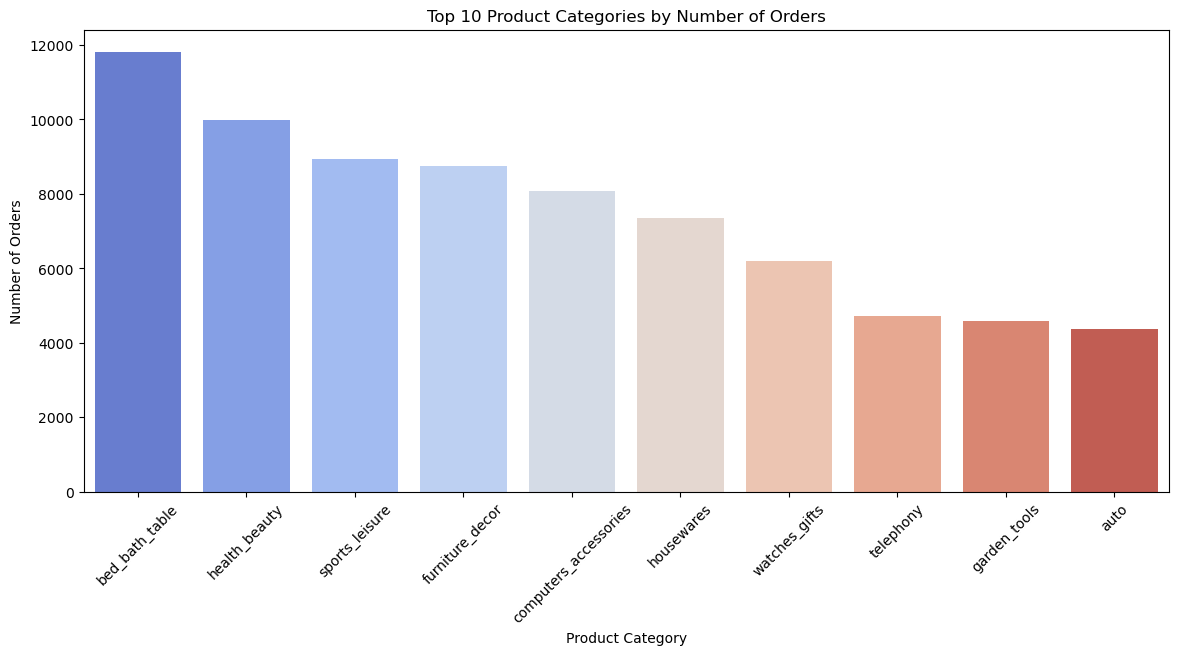

In [17]:
# Aggregate sales by category
category_sales = orders_data.groupby('product_category_name_english').size().reset_index(name='order_count')
top_categories = category_sales.nlargest(10, 'order_count')

plt.figure(figsize=(14, 6))
sns.barplot(data=top_categories, x='product_category_name_english', y='order_count', palette='coolwarm')
plt.title('Top 10 Product Categories by Number of Orders')
plt.xlabel('Product Category')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

/var/folders/_y/rtc0yj4j6pj_34cf7bf1rvk00000gn/T/ipykernel_36645/3918627756.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=payment_types, x='payment_type', y='count', palette='magma')


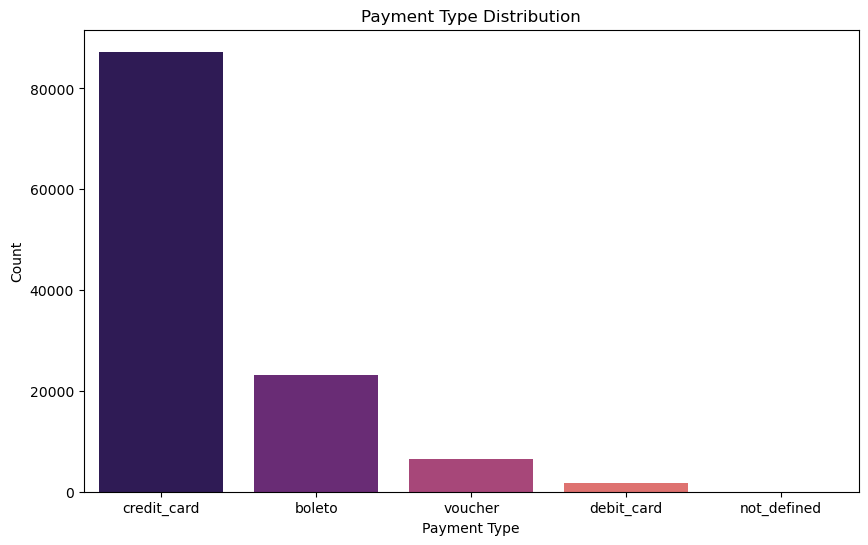

In [19]:
# Payment types
payment_types = orders_data['payment_type'].value_counts().reset_index()
payment_types.columns = ['payment_type', 'count']

plt.figure(figsize=(10, 6))
sns.barplot(data=payment_types, x='payment_type', y='count', palette='magma')
plt.title('Payment Type Distribution')
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.show()

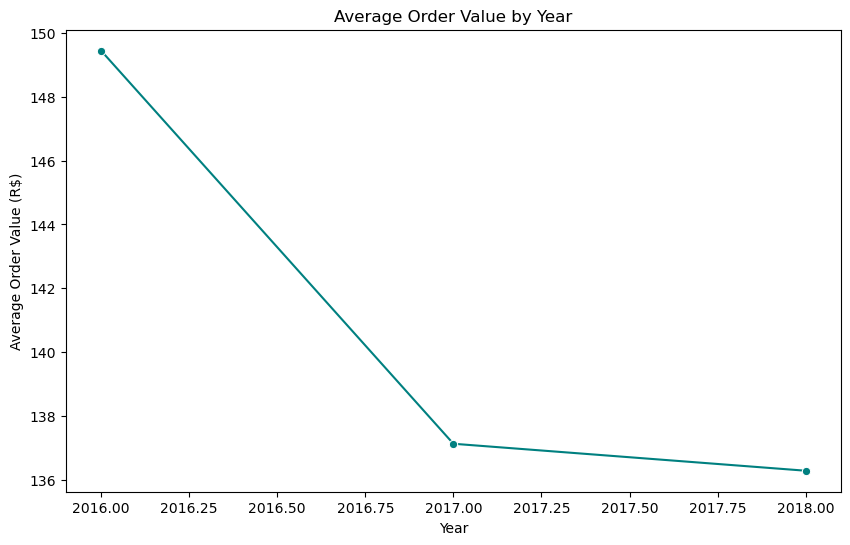

In [21]:
# Average order value by year
orders_data['order_value'] = orders_data['price'] * orders_data['order_item_id']
avg_order_value_year = orders_data.groupby('order_year')['order_value'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_order_value_year, x='order_year', y='order_value', marker='o', color='teal')
plt.title('Average Order Value by Year')
plt.xlabel('Year')
plt.ylabel('Average Order Value (R$)')
plt.show()

In [25]:
print(category_translation_df.head())

    product_category_name product_category_name_english
0            beleza_saude                 health_beauty
1  informatica_acessorios         computers_accessories
2              automotivo                          auto
3         cama_mesa_banho                bed_bath_table
4        moveis_decoracao               furniture_decor
